In [1]:
import os
import cv2
import numpy as np
import pandas as ps
import seaborn as sns
import matplotlib.pyplot as plt

import keras
import tensorflow

from keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import ResNet152
from keras.layers import Input, Lambda, Dense, Flatten, Dropout, BatchNormalization, Activation
from keras.layers.wrappers import TimeDistributed
from keras.layers import LSTM

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score

In [2]:
train_path = "../input/datasetcorr/datasetSegCorr/train/"
test_path = "../input/datasetcorr/datasetSegCorr/test/"

In [3]:
size = (128, 128)

In [4]:
def imageArray(path, size):
    data = []
    Totalnb = 0
    label = []
    i = 0
    sList = os.listdir(path)
    sList.sort
    for d in sList:
        sub_dir = path + d
        nb = 0        
        #if d not in ['ji!-', "d'!-", 'u---', 'Ga-!', 'i---', 'r--']:
        for sd in os.listdir(sub_dir):
            sub_sub_dir = sub_dir + "/" + sd
            tmp = []
            count = 0

            liste = os.listdir(sub_sub_dir)
            for img in liste:
                if count < 12:
                    image_path = sub_sub_dir + "/" + img
                    img_array = cv2.imread(image_path)
                    img_array = cv2.resize(img_array, dsize=size)
                    #print(img_array.shape)
                    count += 1

                    tmp.append(img_array)
                else :
                    break
            if len(tmp) == 16 or len(tmp) == 12:
                #print(np.array(tmp).shape)
                nb += 1
                label.append([d, i])
                data.append(tmp)
                #print(np.array(data).shape)
            else:
                print(d, sd, len(liste))
        if nb != 0:
            i += 1
            #print(d,"Label number of Dataset is:",nb)
            Totalnb = Totalnb + nb
    #print("Total Number of Data is",Totalnb)    
    return data, label, Totalnb

In [5]:
train, train_label, train_totalnb = imageArray(train_path, size)

In [6]:
test, test_label, test_totalnb = imageArray(test_path, size)

In [7]:
x_train = np.array(train)
x_test = np.array(test)

In [8]:
x_train = x_train/255
x_test = x_test/255

In [9]:
train_label = np.array(train_label)
test_label = np.array(test_label)

In [10]:
print(x_train.shape, train_label.shape)
print(x_test.shape, test_label.shape)

(41, 12, 128, 128, 3) (41, 2)
(12, 12, 128, 128, 3) (12, 2)


In [ ]:
def getLabel(label, total, size):
    # shuffling dataset for input fit function
    # if don`t, can`t train model entirely
    print(label.shape)
    label = np.eye(3)[label] 
    print(label.shape)
    x = np.arange(label.shape[0])
    np.random.shuffle(x)
    # same order shuffle is needed
    label = label[x]

    # declare data for training and validation, if you want, you can seperate testset from this
    y = label[0:total]
    return y

In [12]:
train_label[:,0]

array(['u!--', 'u!--', 'u!--', 'u!--', 'u!--', 'u!--', 'u!--', 'u!--',
       'u!--', 'u!--', 'u!--', 'u!--', 'u!--', 'u!--', 'u!--', 'i!--',
       'i!--', 'i!--', 'i!--', 'i!--', 'i!--', 'i!--', 'i!--', 'i!--',
       'i!--', 'i!--', 'i!--', 'a!--', 'a!--', 'a!--', 'a!--', 'a!--',
       'a!--', 'a!--', 'a!--', 'a!--', 'a!--', 'a!--', 'a!--', 'a!--',
       'a!--'], dtype='<U21')

In [11]:
y_train = np.eye(3)[train_label[:,1].astype(int)]
y_train

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [13]:
y_test = test_label[0:,1]
y_test

array(['0', '0', '0', '0', '1', '1', '1', '1', '2', '2', '2', '2'],
      dtype='<U21')

In [71]:
test_label

array([['u!--', '0'],
       ['u!--', '0'],
       ['u!--', '0'],
       ['u!--', '0'],
       ['i!--', '1'],
       ['i!--', '1'],
       ['i!--', '1'],
       ['i!--', '1'],
       ['a!--', '2'],
       ['a!--', '2'],
       ['a!--', '2'],
       ['a!--', '2']], dtype='<U21')

In [15]:
y_test

array(['0', '0', '0', '0', '1', '1', '1', '1', '2', '2', '2', '2'],
      dtype='<U21')

In [ ]:
#y_test = getLabel(test_label[:,1].astype(int), test_totalnb, np.unique(test_label[:,1].astype(int)).shape[0])
#y_train = getLabel(train_label[:,1].astype(int), train_totalnb, np.unique(train_label[:,1].astype(int)).shape[0])

In [ ]:
i = 0
for seq in train:
    for img in seq:
        print(train_label[i][0])
        if train_label[i][1].astype(int) == 1:
            #plt.title(test_label[i])
            plt.imshow(img)
            plt.show()
    i=i+1

In [54]:
resnet152 = ResNet152(input_shape = (128, 128, 3), weights = "imagenet", include_top = False)

In [17]:
resnet152.trainable = False

In [18]:
resnet152.summary()

Model: "resnet152"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1_conv[0][0]                 
__________________________________________________________________________________________

In [55]:
x = Flatten()(resnet152.output)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.3)(x)
cnn_out = Dense(128, activation = "relu")(x)

In [56]:
lstm_inp = Model(inputs = resnet152.input, outputs = cnn_out)

In [57]:
video = Input(shape=(12,128,128,3))

In [58]:
# Distribute CNN output by timesteps 
encoded_frames = TimeDistributed(lstm_inp)(video)

In [59]:
# Contruct LSTM model 
encoded_sequence = LSTM(256)(encoded_frames)
hidden_Drop = Dropout(0.3)(encoded_sequence)
hidden_layer = Dense(128, activation="relu")(hidden_Drop)
outputs = Dense(3, activation="softmax")(hidden_layer)

In [60]:
# Contruct CNN+LSTM model 
model = Model([video], outputs)

In [25]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 12, 128, 128, 3)] 0         
_________________________________________________________________
time_distributed (TimeDistri (None, 12, 128)           92057600  
_________________________________________________________________
lstm (LSTM)                  (None, 256)               394240    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 387       
Total params: 92,485,123
Trainable params: 34,114,179
Non-trainable params: 58,370,944
______________________________________

In [62]:
# Model Compile 
adam = tensorflow.keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss="categorical_crossentropy", optimizer=adam, metrics=["accuracy"])

In [63]:
hist = model.fit(x_train, y_train, 
                 validation_split=0.2,
                 batch_size=10,
                 epochs=300)

Epoch 1/300
4/4 [==============================] - 30s 2s/step - loss: 0.9715 - accuracy: 0.5938 - val_loss: 1.4512 - val_accuracy: 0.0000e+00
Epoch 2/300
4/4 [==============================] - 2s 554ms/step - loss: 0.8699 - accuracy: 0.5625 - val_loss: 1.8427 - val_accuracy: 0.0000e+00
Epoch 3/300
4/4 [==============================] - 2s 558ms/step - loss: 0.4303 - accuracy: 0.8438 - val_loss: 1.6989 - val_accuracy: 0.0000e+00
Epoch 4/300
4/4 [==============================] - 2s 554ms/step - loss: 0.3117 - accuracy: 0.9375 - val_loss: 1.8949 - val_accuracy: 0.0000e+00
Epoch 5/300
4/4 [==============================] - 2s 556ms/step - loss: 0.2239 - accuracy: 0.9688 - val_loss: 1.7979 - val_accuracy: 0.0000e+00
Epoch 6/300
4/4 [==============================] - 2s 554ms/step - loss: 0.1463 - accuracy: 1.0000 - val_loss: 2.1967 - val_accuracy: 0.0000e+00
Epoch 7/300
4/4 [==============================] - 2s 566ms/step - loss: 0.0936 - accuracy: 1.0000 - val_loss: 2.0746 - val_accuracy

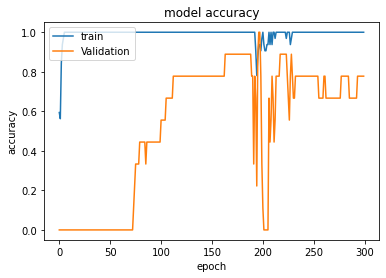

In [64]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()

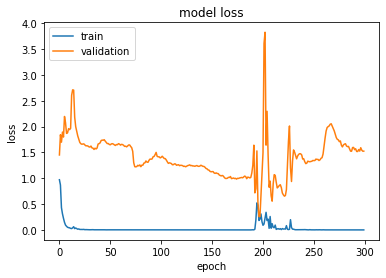

In [65]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [66]:
test = model.predict(x_test)

In [ ]:
test

In [67]:
y_classes = test.argmax(axis=-1)
y_classes

array([0, 0, 0, 0, 2, 1, 1, 1, 2, 2, 2, 2])

In [ ]:
for i in range(11):
    print(y_classes[i], y_true[i])

In [32]:
from sklearn.metrics import classification_report

In [ ]:
y_true = []
for i in y_test:
    n = np.where(i==1)
    y_true.append(int(n[0]))
y_true

In [68]:
gg = y_test.astype(int)==y_classes
test_set_accuracy = np.mean(gg)
test_set_accuracy

0.9166666666666666

In [70]:
print(classification_report(y_test.astype(int), y_classes, labels=[0, 1, 2]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      0.75      0.86         4
           2       0.80      1.00      0.89         4

    accuracy                           0.92        12
   macro avg       0.93      0.92      0.92        12
weighted avg       0.93      0.92      0.92        12



In [74]:
temp = []
for s in y_classes:
    if s == 0:temp.append("u!--")
    elif s == 1: temp.append("i!--")
    elif s == 2: temp.append("a!--")
temp

['u!--',
 'u!--',
 'u!--',
 'u!--',
 'a!--',
 'i!--',
 'i!--',
 'i!--',
 'a!--',
 'a!--',
 'a!--',
 'a!--']

In [75]:
from sklearn.metrics import confusion_matrix

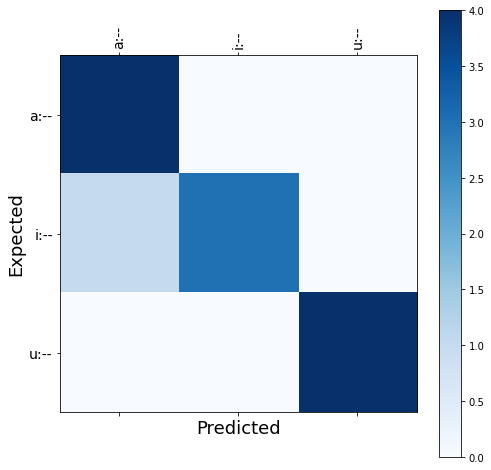

In [76]:
conf_mat = confusion_matrix(y_true=test_label[:,0], y_pred=temp)

fig = plt.figure(figsize=(8,8))
plt.matshow(conf_mat, cmap=plt.cm.Blues, fignum=fig.number)
plt.colorbar()
plt.xticks(np.arange(3), ["a:--", "i:--", "u:--"], rotation=90, fontsize=14)
plt.yticks(np.arange(3), ["a:--", "i:--", "u:--"], fontsize=14)
plt.xlabel('Predicted', fontsize=18)
plt.ylabel('Expected', fontsize=18)
plt.show()